### 필요 library import
---


In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import io
from PIL import Image

from google.cloud import vision
import keras_ocr
import pytesseract
from pytesseract import Output

### 데이터 불러오기
---


In [2]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/image'
data_path

'/aiffel/aiffel/ocr_python/image'

/aiffel/aiffel/ocr_python/image/1.jpg


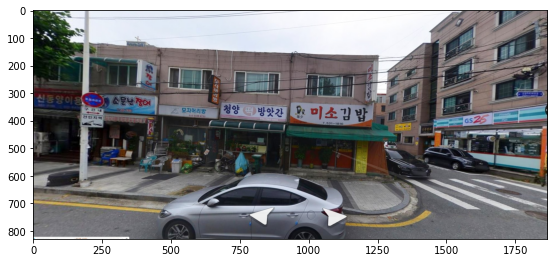

/aiffel/aiffel/ocr_python/image/10.jpg


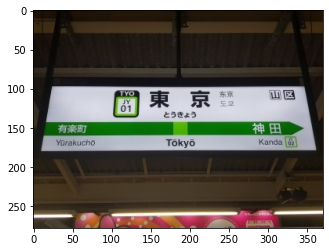

/aiffel/aiffel/ocr_python/image/11.jpg


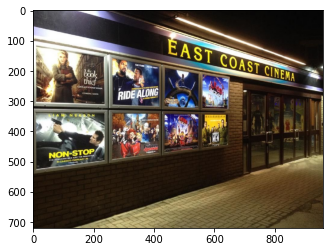

/aiffel/aiffel/ocr_python/image/12.jpg


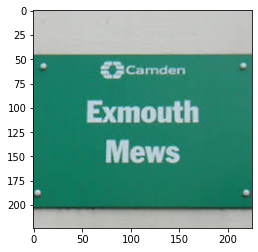

/aiffel/aiffel/ocr_python/image/13.jpg


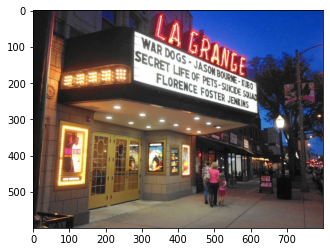

/aiffel/aiffel/ocr_python/image/14.jpg


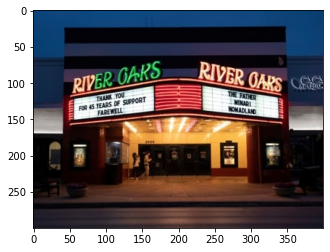

/aiffel/aiffel/ocr_python/image/15.jpg


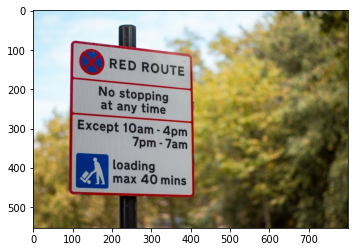

/aiffel/aiffel/ocr_python/image/16.jpg


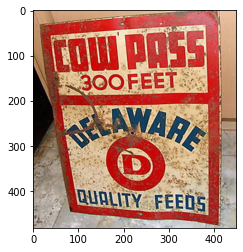

/aiffel/aiffel/ocr_python/image/2.jpg


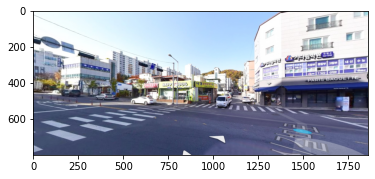

/aiffel/aiffel/ocr_python/image/3.jpg


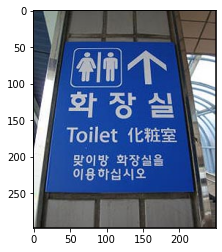

/aiffel/aiffel/ocr_python/image/4.jpg


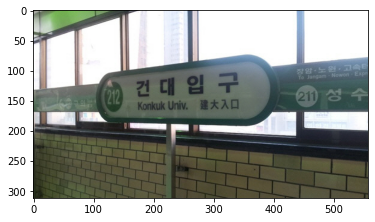

/aiffel/aiffel/ocr_python/image/5.jpg


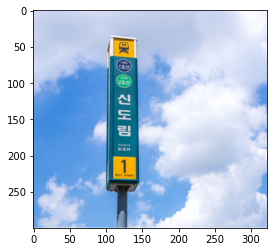

/aiffel/aiffel/ocr_python/image/6.jpg


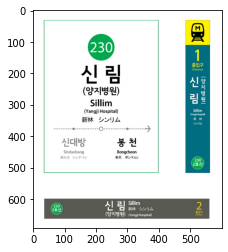

/aiffel/aiffel/ocr_python/image/7.jpg


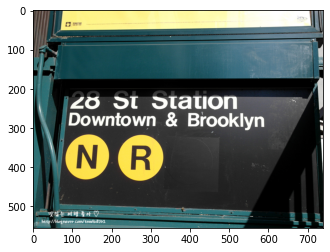

/aiffel/aiffel/ocr_python/image/8.jpg


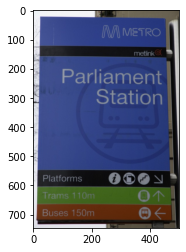

/aiffel/aiffel/ocr_python/image/9.jpg


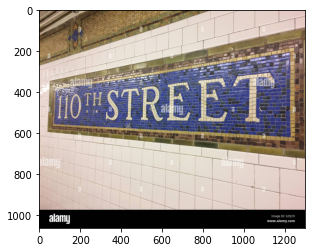

In [8]:
# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)

rows = 20
cols = 1
fig = plt.figure(figsize=(100,100))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    print(path)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


### google api 이용
---

In [11]:
def detect_text(path):
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    
    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    #     for text in texts:
    print('\n"{}"'.format(texts[0].description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in texts[0].bounding_poly.vertices])
    
    print('bounds: {}'.format(','.join(vertices)))
    
    if response.error.message:
        raise Exception(
        '{}\nFor more info on erroe messages, check:' 
        'https://cloud.google.com/apis/design/errors'.format(
        response.error.message))
    
    return texts[0].description

In [12]:
# 다운받은 google ocr api 인증키 경로 저장 확인
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getenv('HOME') + '/aiffel/ocr_python/cookmap-268102-f332eebdd832.json'

total 2200948
-rw-r--r-- 1 root root     420435 Dec  2 01:46  0000.png
-rw-r--r-- 1 root root       2641 Dec  2 01:46  0001.png
-rw-r--r-- 1 root root       9667 Dec  2 01:46  0002.png
-rw-r--r-- 1 root root       1805 Dec  2 01:46  0003.png
-rw-r--r-- 1 root root       3189 Dec  2 01:46  0004.png
-rw-r--r-- 1 root root       3782 Dec  2 01:46  0005.png
-rw-r--r-- 1 root root       8132 Dec  2 01:46  0006.png
-rw-r--r-- 1 root root       5029 Dec  2 01:46  0007.png
-rw-r--r-- 1 root root     590110 Dec  2 01:46  0008.png
-rw-r--r-- 1 root root       4897 Dec  2 01:46  0009.png
-rw-r--r-- 1 root root       4031 Dec  2 01:46  0010.png
-rw-r--r-- 1 root root        164 Dec  2 01:46  0011.png
-rw-r--r-- 1 root root       3337 Dec  2 01:46  0012.png
-rw-r--r-- 1 root root       1157 Dec  2 01:46  0013.png
-rw-r--r-- 1 root root       7807 Dec  2 01:46  0014.png
-rw-r--r-- 1 root root       1104 Dec  2 01:46  0015.png
-rw-r--r-- 1 root root       2905 Dec  2 01:46  0016.png
-rw-r--r-- 1 root

In [13]:
# ocr api 함수 호출
google_ocr_result = []
for path in file_path:
    result = detect_text(path)
    google_ocr_result.extend(result)

Texts:

"신동양이용
|청양 방앗간 미소김밥
GS25
모자머리방
010-248-875o
T.531-1816
건인지역
"
bounds: (11,300),(1652,300),(1652,416),(11,416)
Texts:

"TYO
可区
東京
东京
JY
01
도쿄
とうきょう
有楽町
神田
Yürakucho
Tökyö
Kanda 6
02
"
bounds: (25,101),(333,101),(333,175),(25,175)
Texts:

"EAST COAST CINEMA
CECURE NE HRT
book
thief
COULAGE EOND WORD
RIDE ALONG
COMING SOON
MNEES ON
MEN
PEABODY
THE HACKING WAS AUST THE BEGevyg
N CINEMAS FEBRUARY 29
NON-STOP
"
bounds: (54,94),(873,94),(873,504),(54,504)
Texts:

"Camden
Exmouth
10
Mews
"
bounds: (56,53),(169,53),(169,156),(56,156)
Texts:

"LA GRANGE
WAR DOGS JASON BOURNE-KUBO
SECRET LIFE OF PETS-SUICIDE SQUAD
FLORENCE FOSTER JENKINS
WAR DOGS
"
bounds: (83,14),(629,14),(629,400),(83,400)
Texts:

"RIVER CARS
E
RIVER GARS
THANK YOU
FOR S TEARS OF SUPPORT
FAREWELL
THE FATHER
MINARI
NOMADLAND
"
bounds: (45,66),(399,66),(399,146),(45,146)
Texts:

"RED ROUTE
No stopping
at any time
Except 10am-4pm
7pm - 7am
loading
max 40 mins
"
bounds: (113,123),(392,123),(392,443),(113,443)
Texts:

"NELAW

### keras api 이용
---

In [14]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [15]:
images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

시각화로 확인

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


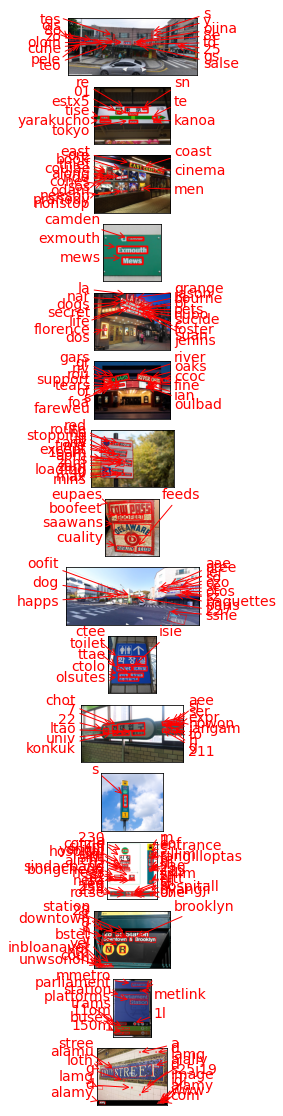

In [17]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions=prediction_groups[idx][0], ax=ax)

### Tesseract api 이용
---

In [18]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang='eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lang,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            try:
                
                cropped_image = image.crop((
                    left,
                    top,
                    left+width,
                    top+height
                ))
                cropped_image.save(output_img_path)
                cropped_image_path_list.append(output_img_path)
                index += 1
            except:
                pass
            
    return cropped_image_path_list

In [19]:
def recognize_images(cropped_image_path_list, lang='kor'):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')
#     return recognized_data


In [56]:
d=file_path[6]
print(d)
cropped_image_path_list = crop_word_regions(d, work_dir, 'eng')

recognize_images(cropped_image_path_list, 'eng')

/aiffel/aiffel/ocr_python/image/15.jpg
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0003.png
/aiffel/aiffel/ocr_python/tesseract/0004.png
/aiffel/aiffel/ocr_python/tesseract/0005.png
/aiffel/aiffel/ocr_python/tesseract/0006.png
/aiffel/aiffel/ocr_python/tesseract/0007.png
/aiffel/aiffel/ocr_python/tesseract/0008.png
/aiffel/aiffel/ocr_python/tesseract/0009.png
/aiffel/aiffel/ocr_python/tesseract/0010.png
/aiffel/aiffel/ocr_python/tesseract/0011.png
/aiffel/aiffel/ocr_python/tesseract/0012.png
/aiffel/aiffel/ocr_python/tesseract/0013.png
/aiffel/aiffel/ocr_python/tesseract/0014.png
/aiffel/aiffel/ocr_python/tesseract/0015.png
/aiffel/aiffel/ocr_python/tesseract/0016.png
/aiffel/aiffel/ocr_python/tesseract/0017.png
/aiffel/aiffel/ocr_python/tesseract/0018.png

No

Stopping

at

any

time

Except

10am

; ‘ eS :

-4pm

7pm

—

Tam

C

loading

5.

m

In [60]:
d=file_path[10]
print(d)
cropped_image_path_list = crop_word_regions(d, work_dir, 'kor')

recognize_images(cropped_image_path_list, 'kor')

/aiffel/aiffel/ocr_python/image/4.jpg
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0003.png
1 ㅣ

오오 |

므블000 1 ! 06

건 란수가마라적이

Done


In [45]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract'
    
    
tesseract_result_path = []
for path in file_path:
    cropped_image_path_list = crop_word_regions(path, work_dir,lang='eng')
    tesseract_result_path.extend(cropped_image_path_list)

/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0003.png
/aiffel/aiffel/ocr_python/tesseract/0004.png
/aiffel/aiffel/ocr_python/tesseract/0005.png
/aiffel/aiffel/ocr_python/tesseract/0006.png
/aiffel/aiffel/ocr_python/tesseract/0007.png
/aiffel/aiffel/ocr_python/tesseract/0008.png
/aiffel/aiffel/ocr_python/tesseract/0009.png
/aiffel/aiffel/ocr_python/tesseract/0010.png
/aiffel/aiffel/ocr_python/tesseract/0011.png
/aiffel/aiffel/ocr_python/tesseract/0012.png
/aiffel/aiffel/ocr_python/tesseract/0013.png
/aiffel/ai

In [48]:
recognize_images(tesseract_result_path, lang='eng')

WWW.alamy.com

WWW.alamy.com

WWW.alamy.com


su

WWW.alamy.com

WWW.alamy.com

WWW.alamy.com


su

a. (lee

7"

|

re

Dron cea)

&

Brooklyn

a) Se

Pe aan

$m re

a ee

=_ me i

» bttp/

Me eee aes Ls

a

ee ee

WWW.alamy.com

WWW.alamy.com

WWW.alamy.com


su

a. (lee

7"

|

re

Dron cea)

&

Brooklyn

a) Se

WWW.alamy.com


su

a. (lee

7"

WWW.alamy.com

WWW.alamy.com


su

a. (lee

7"

|

re

Dron cea)

&

Brooklyn

a) Se

Pe aan

$m re

a ee

=_ me i

» bttp/

Me eee aes Ls

a

ee ee

oa. ae

| ia

—

—

nists

a Fy

a"

Oe reeeensommy


Po

@ afer 3

x!

—i

=


7


WWW.alamy.com


su

a. (lee

7"

|

re

Dron cea)

&

Brooklyn

a) Se

Pe aan

$m re

a ee

=_ me i

» bttp/

Me eee aes Ls

a

ee ee

oa. ae

| ia

—

—

WWW.alamy.com


su

a. (lee

WWW.alamy.com


su

Done


In [53]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract'
    
    
tesseract_result_path = []
for path in file_path:
    cropped_image_path_list = crop_word_regions(path, work_dir, lang='kor')
    tesseract_result_path.extend(cropped_image_path_list)

/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0003.png
/aiffel/aiffel/ocr_python/tesseract/0004.png
/aiffel/aiffel/ocr_python/tesseract/0005.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0000.png
/aiffel/aiffel/ocr_python/tesseract/0001.png
/aiffel/aiffel/ocr_python/tesseract/0002.png
/aiffel/aiffel/ocr_python/tesseract/0003.png
/aiffel/aiffel/ocr_python/tesseract/0004.png
/aiffel/aiffel/ocr_python/tesseract/0005.png
/aiffel/aiffel/ocr_python/tesseract/0006.png
/aiffel/aiffel/ocr_python/tesseract/0007.png
/aiffel/aiffel/ocr_python/tesseract/0008.png
/aiffel/aiffel/ocr_python/tesseract/0009.png
/aiffel/aiffel/ocr_python/tesseract/0010.png
/aiffel/ai

In [54]:
recognize_images(tesseract_result_path, lang='kor')

틴닝

틴닝

틴닝

1,

그

11811


빼

틴닝

틴닝

틴닝

1,

그

11811


빼

웅

000 10012/(

-앨000

에르 -

그

해 총

아

1,


가게


09000

0

늘

~, 바대/

틴닝

틴닝

틴닝

1,

그

11811


빼

웅

000 10012/(

-앨000

에르 -

그

해 총

아

1,


가게

틴닝

1,

그

11811

틴닝

틴닝

1,

그

11811


빼

웅

000 10012/(

-앨000

에르 -

그

해 총

아

1,


가게


09000

0

늘

~, 바대/

시

들

베이 기


나


가드 우구 인


「 =


|


때 000000000으


는 으 "

2,

여터아아이기영


00000

엽             00020             :

시

내

티

|

-


소

양


틴닝

1,

그

11811


빼

웅

000 10012/(

-앨000

에르 -

그

해 총

아

1,


가게


09000

0

늘

~, 바대/

시

들

베이 기


나


가드 우구 인


「 =


|


때 000000000으


는 으 "

틴닝

1,

그

11811


틴닝

1,

그

11811


빼

Done


### 세가지 api 이용결과 비교
---

In [29]:
def ocr_model_comparison(img_idx):
    print('Original image:')
    img = cv2.imread(file_path[img_idx], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
    print('Google OCR API result:\n')
    detect_text(file_path[img_idx])

    print('Tesseract result:\n')
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/'+str(img_idx)
    cropped_image_path = crop_word_regions(file_path[img_idx], work_dir, 'kor')
    recognize_images(cropped_image_path, 'kor')
        
    print('keras-ocr result:\n')
    keras_ocr.tools.drawAnnotations(image=images[img_idx], predictions=prediction_groups[img_idx][0])

Original image:


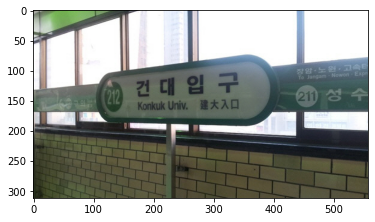

Google OCR API result:

Texts:

"212
Konkuk Univ.
건대입구
장암·노원·고속터
To Jangam Nowon Expre
211 성 수
"
bounds: (108,87),(557,87),(557,168),(108,168)
Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/10/0000.png
/aiffel/aiffel/ocr_python/tesseract/10/0001.png
/aiffel/aiffel/ocr_python/tesseract/10/0002.png
/aiffel/aiffel/ocr_python/tesseract/10/0003.png
1 ㅣ

오오 |

므블000 1 ! 06

건 란수가마라적이

Done
keras-ocr result:



/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


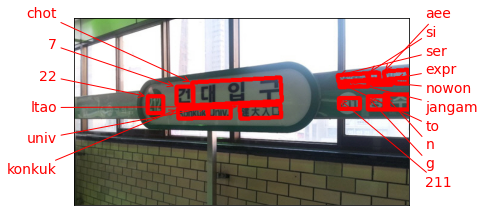

In [30]:
ocr_model_comparison(10)

Original image:


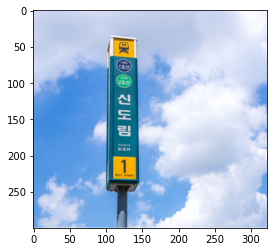

Google OCR API result:

Texts:

"1
신도림
"
bounds: (116,116),(134,116),(134,223),(116,223)
Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/11/0000.png

Done
keras-ocr result:



/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


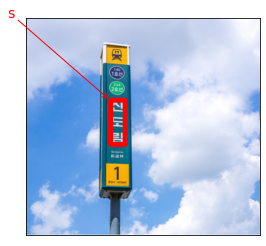

In [31]:
ocr_model_comparison(11)

Original image:


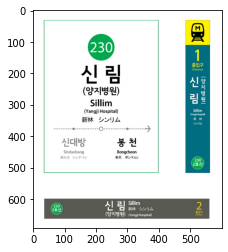

Google OCR API result:

Texts:

"M
230
1
출입구
신림
Entrance
신물
림
(양지병원)
Sillim
(Yangji Hospital)
Sillim
(Yangji Hospital)
新林 シンリム
新林
シンリム
O...........
신대방
봉 천
Sindaebang
新大方 シンデバン
Bongcheon
奉天 ポンチョン
230
(2호선,
신림
Sillim
2
230
(2호선)
新林 シンリム
(양지병원) (Yangji Hospital)
출임구
Entrance
(양지병원)
"
bounds: (52,47),(547,47),(547,658),(52,658)
Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/12/0000.png
/aiffel/aiffel/ocr_python/tesseract/12/0001.png
/aiffel/aiffel/ocr_python/tesseract/12/0002.png
/aiffel/aiffel/ocr_python/tesseract/12/0003.png
/aiffel/aiffel/ocr_python/tesseract/12/0004.png
/aiffel/aiffel/ocr_python/tesseract/12/0005.png
/aiffel/aiffel/ocr_python/tesseract/12/0006.png
/aiffel/aiffel/ocr_python/tesseract/12/0007.png
/aiffel/aiffel/ocr_python/tesseract/12/0008.png
/aiffel/aiffel/ocr_python/tesseract/12/0009.png
/aiffel/aiffel/ocr_python/tesseract/12/0010.png
/aiffel/aiffel/ocr_python/tesseract/12/0011.png
/aiffel/aiffel/ocr_python/tesseract/12/0012.png
/aiffel/aiffel/ocr_python/tess

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


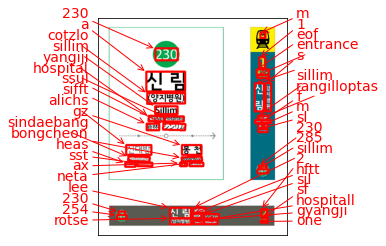

In [32]:
ocr_model_comparison(12)

### 서비스
---
목적: 시각 장애인에게 대한민구 지하철 표지판 등을 소리정보로 전달하기 위해 문자를 인식하여 텍스트화 하는 것\
내용: 지하철 표지판 내용을 정확하게 인식해야 하므로 다양한 각도에서 인식 할 수 있어야 합니다.


### 평가 기준
---
이미지 내 글자 인지,\
발견된 글자 판별,\
한국어 인식 능력


### 결과 비교
---
1. Google OCR API\
이미지 내 육안으로 확인 가능한 글자 대부분을 인지했습니다.\
자동 언어 설정이 되어 한글을 인식하고, 대부분의 글을 정확하게 인식하였습니다.\
2. Tesseract\
인지를 많이 한 듯 싶지만, 판별에서 매우 저조했습니다.\
한글을 인식 할 수 있었습니다.
3. keras\
글자를 정확하게 인지해냈지만, 한국어 인식을 하지 못 해서, 판별을 하지 못 했습니다.
---
결과상 Google OCR API를 필수적으로 사용할 수 밖에 없는 것 같습니다.